# Exercise 08: Seaborn

Подключаемся к базе данных

In [107]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

connection = sqlite3.connect("../data/checking-logs.sqlite")

Работаем с датафреём и выделяем необходимые данные

In [108]:

df = pd.read_sql("""
SELECT 
    uid,
    timestamp,
    numTrials
FROM checker
WHERE uid LIKE 'user_%'
    AND status = 'ready'
    AND labname = 'project1'
""", connection)

Cоздаём график

<Figure size 1500x1000 with 0 Axes>

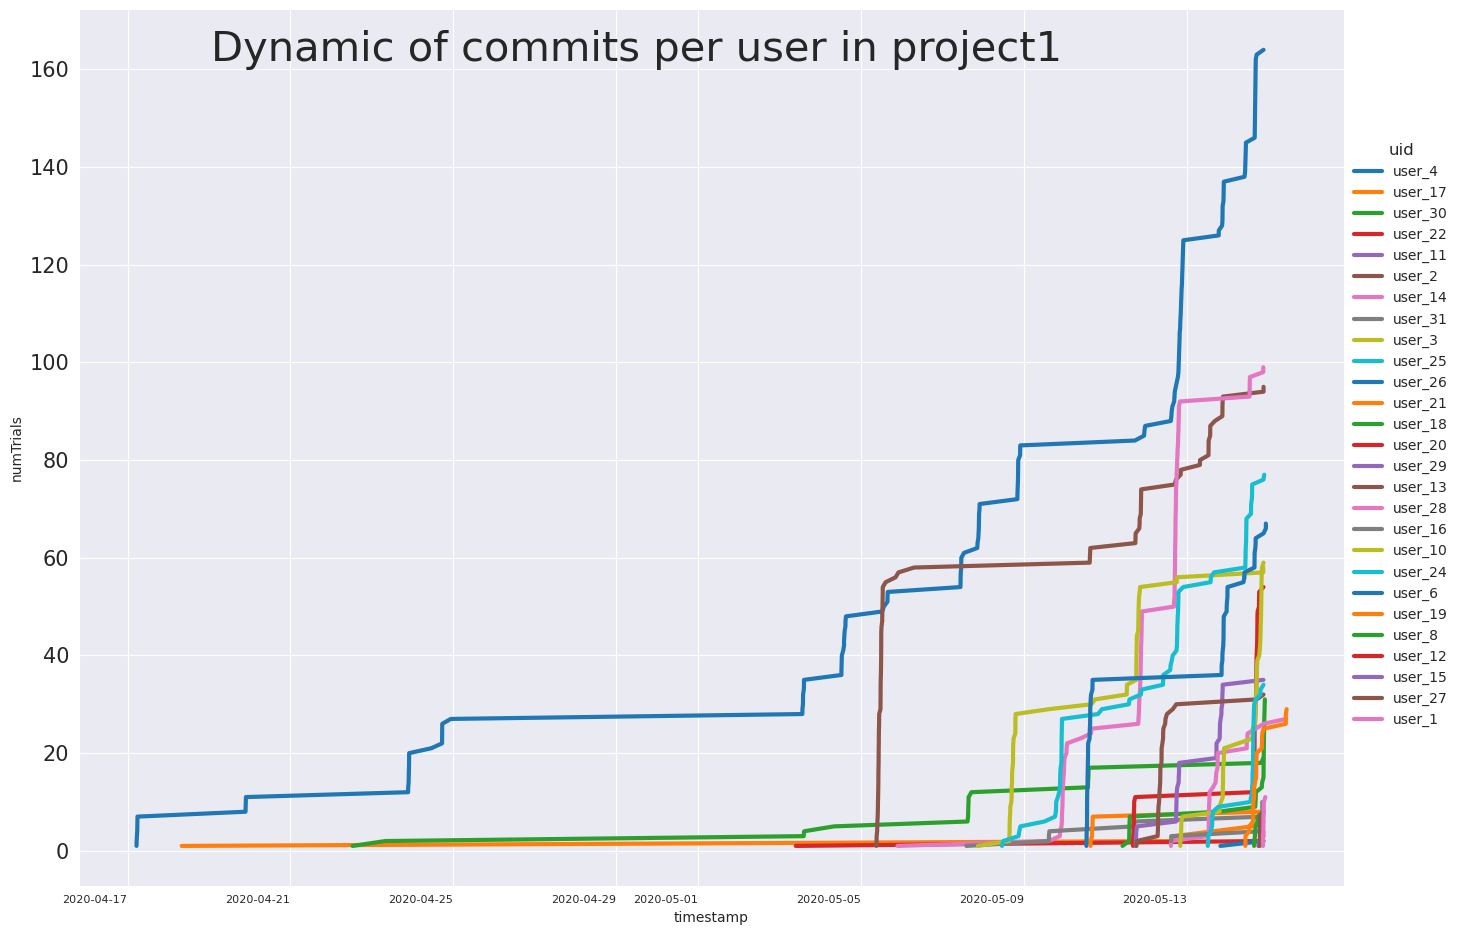

In [ ]:
df['timestamp'] = pd.to_datetime(df['timestamp'])

sns.set_style("darkgrid")
plt.figure(figsize=(15, 10))

g = sns.relplot(
    data=df,
    kind='line',
    x='timestamp',
    y='numTrials',
    hue='uid',
    linewidth=3,
    estimator=None,
    sort=True,
    palette='tab10',
    dashes=False,
    height=10,
    aspect=1.5    
)

g.fig.suptitle('Dynamic of commits per user in project1',
               fontsize=30, 
               y=0.91,     
               x = 0.4,
               horizontalalignment='center')

g._legend.set_title('uid')
g._legend.set_bbox_to_anchor((0.91, 0.5))
for text in g._legend.get_texts():
    text.set_fontsize(10)
g._legend.get_title().set_fontsize(12)

g.ax.tick_params(axis='x', labelsize=15)
g.ax.tick_params(axis='y', labelsize=15)

plt.xticks(rotation=0, ha='right', fontsize=8)

sns.despine()
plt.tight_layout(rect=[0, 0, 0.85, 1]) 
plt.show()

Закрываем соединение с базой данных

In [110]:
connection.close()

Кто из пользователей почти всё время лидировал по количеству коммитов? 

Ответ: `user_4`

Кто из пользователей лидировал лишь непродолжительное время? 

Ответ: `user_2`